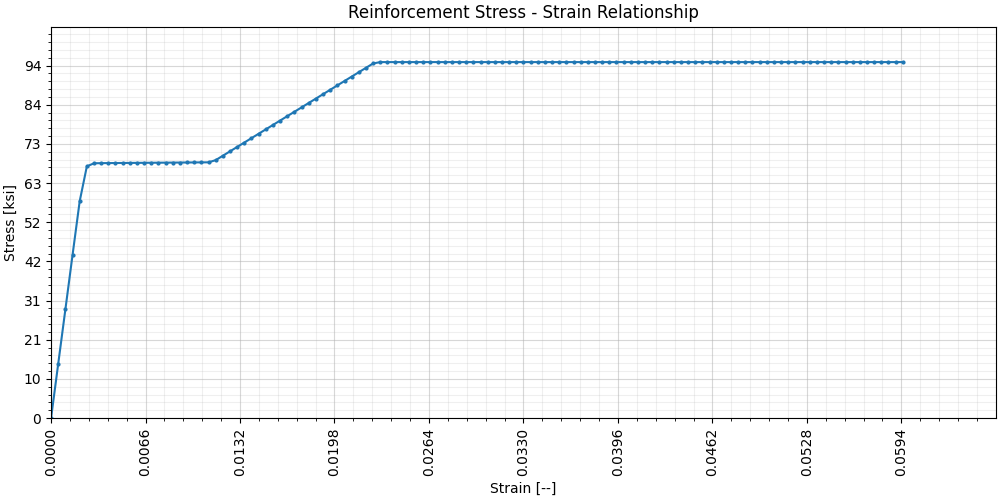

e_sy = 0.0023


,Strain [--],Stress [ksi]
0,0.0000,0.0
1,0.0005,14.5
2,0.0010,29.0
3,0.0015,43.5
4,0.0020,57.9
5,0.0025,67.2
6,0.0030,68.0
7,0.0035,68.0
8,0.0040,68.0
9,0.0045,68.1


In [35]:

from openseespy.opensees import *
import opsvis as opsv

import numpy as np

%matplotlib ipympl
import matplotlib.pyplot as plt

import math
import pandas as pd

# remove existing model
wipe()
plt.close('all')

plt.rcParams['figure.constrained_layout.use'] = True

# STEEL
# Reinforcing steel
# https://openseespydoc.readthedocs.io/en/latest/src/steel4.html
# https://opensees.berkeley.edu/wiki/index.php?title=Steel4_Material
# -------------------------------------------------------------------------
fye    = 68.0      # Yield stress
fue    = 95.0
E0     = 29000.0    # Young's modulus

# Kinematic hardening, parameters from Opensees steel4 recommendations
b_k    = 0.001
R_0    = 20
r_1    = 0.90
r_2    = 0.15

# Isotropic hardening
b_i    = 0.005
b_l    = 0.005
l_yp   = 3.8
rho_i  = 0.08
R_i    = 0

# Ultimate
R_u    = 5
e_suR = 0.06

esy = fye/E0

uniaxialMaterial("Steel4", 3, fye, E0,
                 "-kin", b_k, R_0, r_1, r_2, 
                 "-iso", b_i, b_l, rho_i, R_i, l_yp,
                 "-ult", fue, R_u)

strain_1 = np.arange(0, e_suR, 0.0005)
testUniaxialMaterial(3)
stress_1 = []
for strain_i in strain_1:
    setStrain(strain_i)
    stress_1.append(getStress())


# Plot Stress-Strain relationships
# ----------------------------------------
plt.figure(figsize=(10,5))

esu_max = e_suR*1.1
fs_max = fue*1.1

# Major ticks every 20, minor ticks every 5
major_xticks = np.arange(0, esu_max, esu_max/10)
minor_xticks = np.arange(0, esu_max, esu_max/50)
major_yticks = np.arange(0, fs_max, fs_max/10)
minor_yticks = np.arange(0, fs_max, fs_max/50)    

ax = plt.axes()
ax.set_xticks(major_xticks)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.4f}'.format(x) for x in current_values])

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
#ax.fill_between(curvature, moment, alpha = 0.2)

plt.xlim(0, esu_max)
plt.ylim(0, fs_max)

plt.xlabel('Strain [--]')
plt.ylabel('Stress [ksi]')
plt.title('Reinforcement Stress - Strain Relationship')
plt.plot(strain_1, stress_1, marker = 'o', markersize=2)

plt.xticks(rotation=90)
plt.show()

print('e_sy =', round(esy,4))

# ----------------------------------------
# Display Results Table:
# ----------------------------------------
ResultMatrix = {'Strain [--]': np.round(strain_1,4), 
                'Stress [ksi]': np.round(stress_1,1)}

df = pd.DataFrame(ResultMatrix, columns = ['Strain [--]', 'Stress [ksi]'])
    
pd.set_option('display.max_rows', None)     # Set to None to display all rows
pd.set_option('display.max_columns', None)  # Set to None to display all columns
   
display(df)

wipe()

